# Exploratory Data Analysis

In [6]:
import pandas as pd

In [7]:
data = pd.read_csv('commit_data.csv')
data.tail()

,Repository,Commit Hash,Author,Date and Time,Commit Message,Insertions,Deletions
48912,gpt-neo,2346f4fc099a3615532b5dd398b4beebbd679779,connor,2020-07-05 16:06:51 +0000,Fixed data path for testing,3 files changed,6 insertions(+)
48913,gpt-neo,43c9083614c166ce873c84e6c5ae15db73e79ab4,connor,2020-07-05 15:31:07 +0000,"Refactored input function, support for samplin...",7 files changed,90 insertions(+)
48914,gpt-neo,762ac92f3ebc1bef1a5126b1e0c76f0c0413ccaf,connor,2020-07-05 15:06:11 +0000,Add .gitignore,1 file changed,110 insertions(+)
48915,gpt-neo,187fb4f3e9460f3b27d7cea4fac25cade975596c,connor,2020-07-05 10:41:49 +0000,Exposed local attention as a parameter,6 files changed,13 insertions(+)
48916,gpt-neo,82eca2074bb010512fa0779d26dc9e71e33d7eb8,connor,2020-07-05 10:35:45 +0000,Small README updates,1 file changed,8 insertions(+)


In [8]:
#how big is my data
data.shape

(48917, 7)

In [9]:
# look at the different data repositories from the scrape
for col in data:
  print(data['Repository'].unique())

['transformers' 'pandas' 'gpt-neo']
['transformers' 'pandas' 'gpt-neo']
['transformers' 'pandas' 'gpt-neo']
['transformers' 'pandas' 'gpt-neo']
['transformers' 'pandas' 'gpt-neo']
['transformers' 'pandas' 'gpt-neo']
['transformers' 'pandas' 'gpt-neo']


In [10]:
# count the data entries for each repository that was scraped
data.Repository.value_counts()

Repository
pandas          33608
transformers    14426
gpt-neo           883
Name: count, dtype: int64

In [11]:
#Check to see the oldest commit pulled and the newest 
oldest_commit = print(min(data['Date and Time']))
newest_commit = print(max(data['Date and Time']))
oldest_commit
newest_commit

2009-08-05 02:32:49 +0000
2023-11-08 16:27:37 +0800


In [12]:
# we do not want to take commits from 2009. Let's narrow our data to show just 2023 
# first step is to look at the data types before we do this
data.dtypes

Repository        object
Commit Hash       object
Author            object
Date and Time     object
Commit Message    object
Insertions        object
Deletions         object
dtype: object

In [13]:
#convert date and time to datetime64
data['Date and Time'] = pd.to_datetime(data['Date and Time'], utc=True)
#check data types again
data.dtypes

Repository                     object
Commit Hash                    object
Author                         object
Date and Time     datetime64[ns, UTC]
Commit Message                 object
Insertions                     object
Deletions                      object
dtype: object

In [14]:
data.head()

,Repository,Commit Hash,Author,Date and Time,Commit Message,Insertions,Deletions
0,transformers,b6dbfee0a21d333447b47887dbe2cb87720ebfd0,"Hz, Ji",2023-11-08 08:27:37+00:00,moving example of benchmarking to legacy dir (...,4 files changed,0 insertions(+)
1,transformers,be74b2ead69df1849ec62ac5c86c7d5dee663448,Yoach Lacombe,2023-11-08 07:39:37+00:00,Add numpy alternative to FE using torchaudio (...,9 files changed,208 insertions(+)
2,transformers,e2647450511e44ad9020d7d5dd455b2851850538,jiaqiw09,2023-11-07 23:34:33+00:00,translate model_sharing.md and llm_tutorial.md...,3 files changed,511 insertions(+)
3,transformers,f213d5dd8cea1eb31d9b44dbdf268e4265a6d338,九是否随意的称呼,2023-11-07 23:31:51+00:00,translate the en tokenizer_summary.md to Chine...,2 files changed,236 insertions(+)
4,transformers,7e1eff7600085814eac65876d4d8a0e38c2f6ccc,Plemeur,2023-11-07 21:40:00+00:00,Allow scheduler parameters (#26480),3 files changed,24 insertions(+)


In [15]:
filtered_data = data.loc[(data['Date and Time'] >= '2023-01-01') & (data['Date and Time'] < '2024-01-01')]
filtered_data.shape

(5325, 7)

In [16]:
#check the oldest and newest commits of the new range
oldest_commit = print(min(filtered_data['Date and Time']))
newest_commit = print(max(filtered_data['Date and Time']))
oldest_commit
newest_commit

2023-01-02 09:02:42+00:00
2023-11-08 08:27:37+00:00


We can see that no one really did any commits on 1st Jan but that the data runs up until 8 Nov. When it comes to automation, we can run this every hour of the day and make sure we get the latest information. This can be shown with the dashboards

https://linearb.io/platform/engineering-metrics?_bt=669057019803&_bk=git%20analysis&_bm=p&_bn=g&_bg=148510987137&utm_term=git%20analysis&utm_medium=cpc&utm_campaign=Git_Analytics_EMEA&utm_source=google&gclid=CjwKCAiAxreqBhAxEiwAfGfndCduGD6_KX6t3Qac2xOVSAZ0goT91wMJuubVWZg_3B5crAD1EvmTVRoC7WEQAvD_BwE

https://www.swarmia.com/git-analytics/?utm_term=git%20commit%20analysis&utm_campaign=SRH-REPORTING-EU-EN&utm_source=adwords&utm_medium=ppc&hsa_acc=6644081770&hsa_cam=16463390782&hsa_grp=134848023035&hsa_ad=587278803490&hsa_src=g&hsa_tgt=kwd-845407978495&hsa_kw=git%20commit%20analysis&hsa_mt=e&hsa_net=adwords&hsa_ver=3&gclid=CjwKCAiAxreqBhAxEiwAfGfndFRHVoR4zEmqadAYvclCZJlbyFL1rKjLGDw5QOoBI5_cLwoHxSCtyxoCoVIQAvD_BwE

https://insights.keypup.io/git-metrics/?utm_term=git%20analytics&utm_campaign=Search+%7C+Prospecting+%7C+Product+%7C+UK/US&utm_source=adwords&utm_medium=ppc&hsa_acc=3825144411&hsa_cam=18198813780&hsa_grp=145858793972&hsa_ad=618979516545&hsa_src=g&hsa_tgt=kwd-370383172922&hsa_kw=git%20analytics&hsa_mt=p&hsa_net=adwords&hsa_ver=3&gclid=CjwKCAiAxreqBhAxEiwAfGfndGn-jxbe99WP6MsThbohVYcrudC0FYUGcgVhYSCZkx3gwIrzjJMBNBoCWZoQAvD_BwE ($999 up to 300 selected repos/projects) unlimited users...



## New discovery
There is a package called GitStats: https://gitstats.sourceforge.net/ that does a git history statistic generation. It does: <br>
- General statistics: total files, lines, commits, authors. <br>
- Activity: commits by hour of day, day of week, hour of week, month of year, year and month, and year.<br>
- Authors: list of authors (name, commits (%), first commit date, last commit date, age), author of month, author of year.<br>
- Files: file count by date, extensions<br>
- Lines: Lines of Code by date

# Data Transformation

In [17]:
#start by sorting creating new column to show just the date without an actual timestamp
filtered_data['Date'] = filtered_data['Date and Time'].dt.date
filtered_data.head()

/var/folders/6n/20kf21pj1mqgt2zyjq655p340000gn/T/ipykernel_4144/3767783870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = filtered_data['Date and Time'].dt.date


,Repository,Commit Hash,Author,Date and Time,Commit Message,Insertions,Deletions,Date
0,transformers,b6dbfee0a21d333447b47887dbe2cb87720ebfd0,"Hz, Ji",2023-11-08 08:27:37+00:00,moving example of benchmarking to legacy dir (...,4 files changed,0 insertions(+),2023-11-08
1,transformers,be74b2ead69df1849ec62ac5c86c7d5dee663448,Yoach Lacombe,2023-11-08 07:39:37+00:00,Add numpy alternative to FE using torchaudio (...,9 files changed,208 insertions(+),2023-11-08
2,transformers,e2647450511e44ad9020d7d5dd455b2851850538,jiaqiw09,2023-11-07 23:34:33+00:00,translate model_sharing.md and llm_tutorial.md...,3 files changed,511 insertions(+),2023-11-07
3,transformers,f213d5dd8cea1eb31d9b44dbdf268e4265a6d338,九是否随意的称呼,2023-11-07 23:31:51+00:00,translate the en tokenizer_summary.md to Chine...,2 files changed,236 insertions(+),2023-11-07
4,transformers,7e1eff7600085814eac65876d4d8a0e38c2f6ccc,Plemeur,2023-11-07 21:40:00+00:00,Allow scheduler parameters (#26480),3 files changed,24 insertions(+),2023-11-07


In [18]:
filtered_data['Commit Hash'].unique().size

5325

In [19]:
filtered_data['Commit Hash'].nunique()

5325

In [20]:
#extract number part of the insertions column 
filtered_data['# Insertions'] = pd.to_numeric(filtered_data['Insertions'].str.extract('(\d+)')[0], errors='coerce').fillna(0).astype(int)
filtered_data.head()

/var/folders/6n/20kf21pj1mqgt2zyjq655p340000gn/T/ipykernel_4144/3263056670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['# Insertions'] = pd.to_numeric(filtered_data['Insertions'].str.extract('(\d+)')[0], errors='coerce').fillna(0).astype(int)


,Repository,Commit Hash,Author,Date and Time,Commit Message,Insertions,Deletions,Date,# Insertions
0,transformers,b6dbfee0a21d333447b47887dbe2cb87720ebfd0,"Hz, Ji",2023-11-08 08:27:37+00:00,moving example of benchmarking to legacy dir (...,4 files changed,0 insertions(+),2023-11-08,4
1,transformers,be74b2ead69df1849ec62ac5c86c7d5dee663448,Yoach Lacombe,2023-11-08 07:39:37+00:00,Add numpy alternative to FE using torchaudio (...,9 files changed,208 insertions(+),2023-11-08,9
2,transformers,e2647450511e44ad9020d7d5dd455b2851850538,jiaqiw09,2023-11-07 23:34:33+00:00,translate model_sharing.md and llm_tutorial.md...,3 files changed,511 insertions(+),2023-11-07,3
3,transformers,f213d5dd8cea1eb31d9b44dbdf268e4265a6d338,九是否随意的称呼,2023-11-07 23:31:51+00:00,translate the en tokenizer_summary.md to Chine...,2 files changed,236 insertions(+),2023-11-07,2
4,transformers,7e1eff7600085814eac65876d4d8a0e38c2f6ccc,Plemeur,2023-11-07 21:40:00+00:00,Allow scheduler parameters (#26480),3 files changed,24 insertions(+),2023-11-07,3


In [21]:
#extract number part of the deletions column 
filtered_data['# Deletions'] = pd.to_numeric(filtered_data['Deletions'].str.extract('(\d+)')[0], errors='coerce').fillna(0).astype(int)
filtered_data.head()

/var/folders/6n/20kf21pj1mqgt2zyjq655p340000gn/T/ipykernel_4144/2712100933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['# Deletions'] = pd.to_numeric(filtered_data['Deletions'].str.extract('(\d+)')[0], errors='coerce').fillna(0).astype(int)


,Repository,Commit Hash,Author,Date and Time,Commit Message,Insertions,Deletions,Date,# Insertions,# Deletions
0,transformers,b6dbfee0a21d333447b47887dbe2cb87720ebfd0,"Hz, Ji",2023-11-08 08:27:37+00:00,moving example of benchmarking to legacy dir (...,4 files changed,0 insertions(+),2023-11-08,4,0
1,transformers,be74b2ead69df1849ec62ac5c86c7d5dee663448,Yoach Lacombe,2023-11-08 07:39:37+00:00,Add numpy alternative to FE using torchaudio (...,9 files changed,208 insertions(+),2023-11-08,9,208
2,transformers,e2647450511e44ad9020d7d5dd455b2851850538,jiaqiw09,2023-11-07 23:34:33+00:00,translate model_sharing.md and llm_tutorial.md...,3 files changed,511 insertions(+),2023-11-07,3,511
3,transformers,f213d5dd8cea1eb31d9b44dbdf268e4265a6d338,九是否随意的称呼,2023-11-07 23:31:51+00:00,translate the en tokenizer_summary.md to Chine...,2 files changed,236 insertions(+),2023-11-07,2,236
4,transformers,7e1eff7600085814eac65876d4d8a0e38c2f6ccc,Plemeur,2023-11-07 21:40:00+00:00,Allow scheduler parameters (#26480),3 files changed,24 insertions(+),2023-11-07,3,24


In [22]:
#extract time component to look at commits by hour
filtered_data['Hour of Day'] = filtered_data['Date and Time'].dt.strftime('%H')
filtered_data.head()

/var/folders/6n/20kf21pj1mqgt2zyjq655p340000gn/T/ipykernel_4144/2488700089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Hour of Day'] = filtered_data['Date and Time'].dt.strftime('%H')


,Repository,Commit Hash,Author,Date and Time,Commit Message,Insertions,Deletions,Date,# Insertions,# Deletions,Hour of Day
0,transformers,b6dbfee0a21d333447b47887dbe2cb87720ebfd0,"Hz, Ji",2023-11-08 08:27:37+00:00,moving example of benchmarking to legacy dir (...,4 files changed,0 insertions(+),2023-11-08,4,0,08
1,transformers,be74b2ead69df1849ec62ac5c86c7d5dee663448,Yoach Lacombe,2023-11-08 07:39:37+00:00,Add numpy alternative to FE using torchaudio (...,9 files changed,208 insertions(+),2023-11-08,9,208,07
2,transformers,e2647450511e44ad9020d7d5dd455b2851850538,jiaqiw09,2023-11-07 23:34:33+00:00,translate model_sharing.md and llm_tutorial.md...,3 files changed,511 insertions(+),2023-11-07,3,511,23
3,transformers,f213d5dd8cea1eb31d9b44dbdf268e4265a6d338,九是否随意的称呼,2023-11-07 23:31:51+00:00,translate the en tokenizer_summary.md to Chine...,2 files changed,236 insertions(+),2023-11-07,2,236,23
4,transformers,7e1eff7600085814eac65876d4d8a0e38c2f6ccc,Plemeur,2023-11-07 21:40:00+00:00,Allow scheduler parameters (#26480),3 files changed,24 insertions(+),2023-11-07,3,24,21


# Data Analyses

## Authors

In [23]:
#look at the the number of authors' for by day
authors = filtered_data.groupby(['Date', 'Repository'])['Author'].count().reset_index()
authors_sorted = authors.sort_values(by='Date', ascending=False)
authors_sorted.head(5)

,Date,Repository,Author
539,2023-11-08,transformers,2
538,2023-11-07,transformers,14
537,2023-11-07,pandas,19
536,2023-11-06,transformers,10
535,2023-11-06,pandas,8


In [24]:
#number of authors' by hour of the day
authors_by_hour = filtered_data.groupby(['Date','Hour of Day', 'Repository'])['Author'].count().reset_index()
authors_sorted_by_hour = authors_by_hour.sort_values(by='Date', ascending=False)
authors_sorted_by_hour.head(5)

,Date,Hour of Day,Repository,Author
2959,2023-11-08,08,transformers,1
2958,2023-11-08,07,transformers,1
2948,2023-11-07,15,transformers,1
2938,2023-11-07,01,pandas,5
2939,2023-11-07,02,pandas,1


# what time zone? is this the authors' local time or the timezone of github?

## Commit Hashes

In [25]:
#look at the the number of commit hashes by day
commit_hashes = filtered_data.groupby(['Date', 'Repository'])['Commit Hash'].count().reset_index()
commit_hashes_sorted = commit_hashes.sort_values(by='Date', ascending=False)
commit_hashes_sorted.head(5)

,Date,Repository,Commit Hash
539,2023-11-08,transformers,2
538,2023-11-07,transformers,14
537,2023-11-07,pandas,19
536,2023-11-06,transformers,10
535,2023-11-06,pandas,8


In [26]:
#look at the the number of commit hashes for by hour
commit_hashes_by_hour = filtered_data.groupby(['Date','Hour of Day','Repository'])['Commit Hash'].count().reset_index()
commit_hashes_sorted_by_hour = commit_hashes_by_hour.sort_values(by='Date', ascending=False)
commit_hashes_sorted_by_hour.head(5)

,Date,Hour of Day,Repository,Commit Hash
2959,2023-11-08,08,transformers,1
2958,2023-11-08,07,transformers,1
2948,2023-11-07,15,transformers,1
2938,2023-11-07,01,pandas,5
2939,2023-11-07,02,pandas,1


In [27]:
#look at the the average number of commit hashes by day
#set up count
commit_hashes = filtered_data.groupby(['Date', 'Repository'])['Commit Hash'].count().reset_index(name='Commit Count')
#set up average
average_commit_hashes = commit_hashes.groupby(['Date', 'Repository'])['Commit Count'].mean().reset_index(name='Average Commit Count')
#sort by date descending
average_commit_hashes_sorted = average_commit_hashes.sort_values(by='Date', ascending=False)
#preview
average_commit_hashes_sorted.head(5)

,Date,Repository,Average Commit Count
539,2023-11-08,transformers,2.0
538,2023-11-07,transformers,14.0
537,2023-11-07,pandas,19.0
536,2023-11-06,transformers,10.0
535,2023-11-06,pandas,8.0


In [28]:
# distribution of commit hashes
print(commit_hashes_sorted.describe())

       Commit Hash
count   540.000000
mean      9.861111
std       5.802978
min       1.000000
25%       5.000000
50%      10.000000
75%      14.000000
max      31.000000


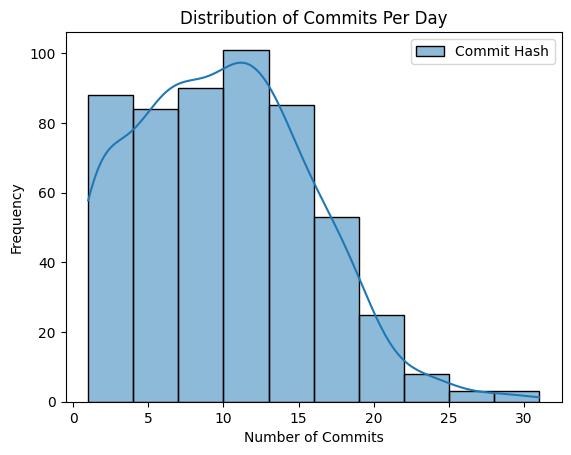

In [34]:
#plot distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(commit_hashes_sorted, bins=10, kde=True)
plt.title('Distribution of Commits Per Day')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.show()

## Commits Insertions & Deletions by Author

In [35]:
#count the number of commits by author
author_commits = filtered_data.groupby('Author').size().reset_index(name='# Commits')

#calculate the sum of insertions by Author
author_sum_insertions = filtered_data.groupby('Author')['# Insertions'].sum().reset_index(name='Sum of Insertions')

#calculate the sum of deletions by Author
author_sum_deletions = filtered_data.groupby('Author')['# Deletions'].sum().reset_index(name='Sum of Deletions')

#merge the findings and sort by author
merge_insertions_with_commits = pd.merge(author_commits, author_sum_insertions, on='Author')

#merge deletions with commits
merged = pd.merge(merge_insertions_with_commits, author_sum_deletions, on='Author')

#drop duplicates
merged = merged.drop_duplicates()

#sort the values in descending order and then display findings
merged = merged.sort_values(by='# Commits', ascending=False)
merged

,Author,# Commits,Sum of Insertions,Sum of Deletions
910,jbrockmendel,454,2991,36208
561,Patrick Hoefler,369,1518,15314
825,Yih-Dar,359,1641,33194
475,Matthew Roeschke,280,2094,27099
723,Sylvain Gugger,193,3753,26642
...,...,...,...,...
386,Kaede Fujisaki,1,1,2
388,Kai Mühlbauer,1,1,1
389,Kaito Sugimoto,1,6,8
390,Kamal Raj Kanakarajan,1,1,28


## Insertions

In [36]:
#look at the the number of insertions by day
insertions = filtered_data.groupby(['Date', 'Repository'])['# Insertions'].sum().reset_index()
insertions_sorted = insertions.sort_values(by='Date', ascending=False)
insertions_sorted.head(5)

,Date,Repository,# Insertions
539,2023-11-08,transformers,13
538,2023-11-07,transformers,26
537,2023-11-07,pandas,133
536,2023-11-06,transformers,56
535,2023-11-06,pandas,22


In [37]:
#look at the the number of insertions by hour the day
insertions_by_hour = filtered_data.groupby(['Date', 'Hour of Day', 'Repository'])['# Insertions'].sum().reset_index()
insertions_by_hour_sorted = insertions_by_hour.sort_values(by='Date', ascending=False)
insertions_by_hour_sorted.head(5)

,Date,Hour of Day,Repository,# Insertions
2959,2023-11-08,08,transformers,4
2958,2023-11-08,07,transformers,9
2948,2023-11-07,15,transformers,1
2938,2023-11-07,01,pandas,41
2939,2023-11-07,02,pandas,2


In [38]:
#look at the the average number of commit hashes by day
#set up count
count_insertions = filtered_data.groupby(['Date', 'Repository'])['# Insertions'].count().reset_index(name='# Insertions')
#set up average
average_count_insertions = count_insertions.groupby(['Date', 'Repository'])['# Insertions'].mean().reset_index(name='Average # Insertions')
#sort by date descending
average_count_insertions_sorted = average_count_insertions.sort_values(by='Date', ascending=False)
#preview
average_count_insertions_sorted.head(5)

,Date,Repository,Average # Insertions
539,2023-11-08,transformers,2.0
538,2023-11-07,transformers,14.0
537,2023-11-07,pandas,19.0
536,2023-11-06,transformers,10.0
535,2023-11-06,pandas,8.0


In [39]:
# distribution of commit hashes
print(average_count_insertions_sorted.describe())

       Average # Insertions
count            540.000000
mean               9.861111
std                5.802978
min                1.000000
25%                5.000000
50%               10.000000
75%               14.000000
max               31.000000


In [40]:
#is there a power law present?

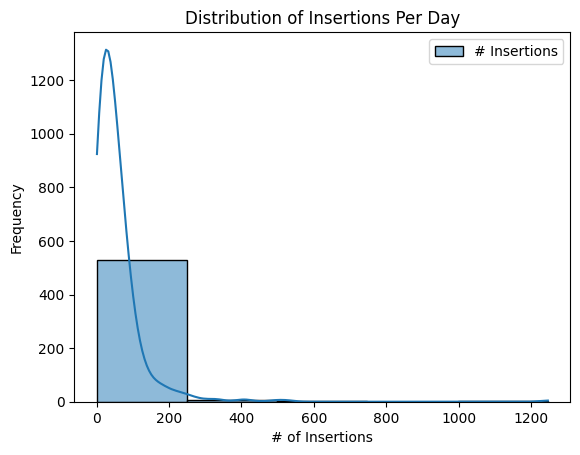

In [45]:
#plot distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(insertions_sorted, bins=5, kde=True)
plt.title('Distribution of Insertions Per Day')
plt.xlabel('# of Insertions')
plt.ylabel('Frequency')
plt.show()

## Deletions

In [51]:
#look at the the number of deletions by day
deletions = filtered_data.groupby(['Date', 'Repository'])['# Deletions'].sum().reset_index()
deletions_sorted = deletions.sort_values(by='Date', ascending=False)
deletions_sorted.head(5)

,Date,Repository,# Deletions
539,2023-11-08,transformers,208
538,2023-11-07,transformers,1402
537,2023-11-07,pandas,940
536,2023-11-06,transformers,139
535,2023-11-06,pandas,182


In [52]:
#look at the the number of deletions by hour of the day
deletions_by_hour = filtered_data.groupby(['Date','Hour of Day', 'Repository'])['# Deletions'].sum().reset_index()
deletions_by_hour_sorted = deletions_by_hour.sort_values(by='Date', ascending=False)
deletions_by_hour_sorted.head(5)

,Date,Hour of Day,Repository,# Deletions
2959,2023-11-08,08,transformers,0
2958,2023-11-08,07,transformers,208
2948,2023-11-07,15,transformers,1
2938,2023-11-07,01,pandas,210
2939,2023-11-07,02,pandas,9


In [53]:
#look at the the average number of commit hashes by day
#set up count
deletions_count = filtered_data.groupby(['Date', 'Repository'])['# Deletions'].count().reset_index(name='# Deletions')
#set up average
average_deletions = deletions_count.groupby(['Date', 'Repository'])['# Deletions'].mean().reset_index(name='Average # Deletions')
#sort by date descending
average_deletions_sorted = average_deletions.sort_values(by='Date', ascending=False)
#preview
average_deletions_sorted.head(5)

,Date,Repository,Average # Deletions
539,2023-11-08,transformers,2.0
538,2023-11-07,transformers,14.0
537,2023-11-07,pandas,19.0
536,2023-11-06,transformers,10.0
535,2023-11-06,pandas,8.0


In [54]:
# distribution of commit hashes
print(deletions.describe())

        # Deletions
count    540.000000
mean    1136.785185
std     1809.058127
min        1.000000
25%      192.250000
50%      495.500000
75%     1199.250000
max    15952.000000


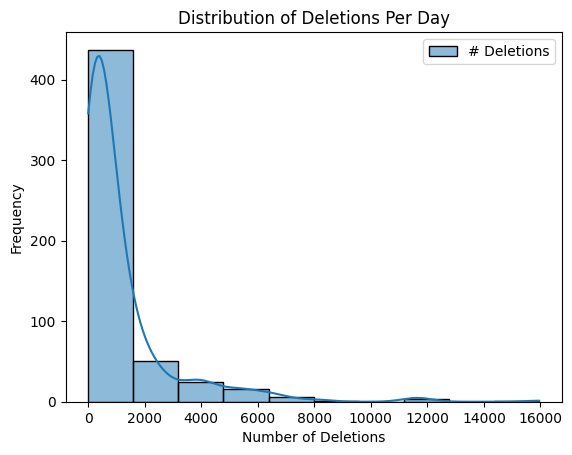

In [57]:
#plot distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(deletions, bins=10, kde=True)
plt.title('Distribution of Deletions Per Day')
plt.xlabel('Number of Deletions')
plt.ylabel('Frequency')
plt.show()